# Fores Fires (Regression)
## Data Cleaning, Exploration and Wrangling

### Source
- https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('lake/forest_fires/forestfires.csv')
print(df.shape)
df.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Types of Features

In [3]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [4]:
categorical_cols = ['month', 'day']
df[categorical_cols].describe()

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [5]:
numerical_cols = [col for col in df.columns.tolist() if not col in categorical_cols]
df[numerical_cols].describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Missing Values

In [6]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

No missing values

### Duplicated Values

In [7]:
df[df.duplicated(keep=False)]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
52,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
99,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
214,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
302,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


### Feature Exploration

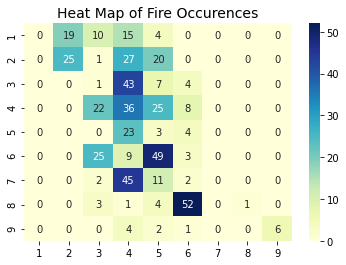

In [8]:
# Coordinates
position = df.groupby(['X', 'Y']).count()['month'].unstack().fillna(0)
position.index.name = None
position.columns.name = None
position = pd.concat([position, pd.DataFrame({1: np.zeros(9), 7:np.zeros(9)},index=position.index)],  axis = 1)
position = position.reindex(sorted(position.columns), axis=1).astype(int)
ax = sns.heatmap(position, annot=True, cmap="YlGnBu")
ax.set_title('Heat Map of Fire Occurences', fontsize='14');

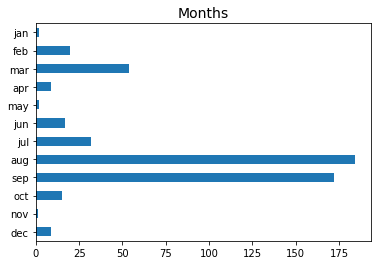

In [9]:
# Month
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df['month'] = pd.Categorical(df['month'], ["jan", "feb", "mar", "apr", "may", "jun",
                                           "jul", "aug", "sep", "oct", "nov", "dec"])
ax = df.month.value_counts(sort=False).sort_index(ascending=False).plot.barh()
ax.set_title("Months", fontsize=14);

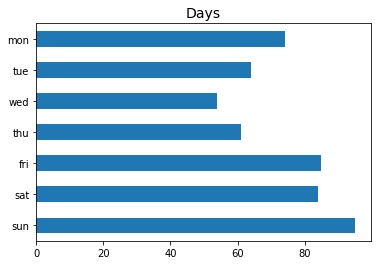

In [10]:
# Day
df['day'] = pd.Categorical(df['day'], ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])
ax = df.day.value_counts(sort=False).sort_index(ascending=False).plot.barh()
ax.set_title("Days", fontsize=14);

#### Forest Weather Index (FWI)
Is a Canadian system for rating fire danter. It includes six components (Cortez et al).
- Fine Fuel Moisture Code (FFMC): moisture content surface litter and influences ignition and fire spread
- Initial Spread Index (ISI): Fire velocity spread
- Duff Moisture Code (DMC): moisture content of shallow organic layers
- Drought Code (DC): moisture content of deep organic layers

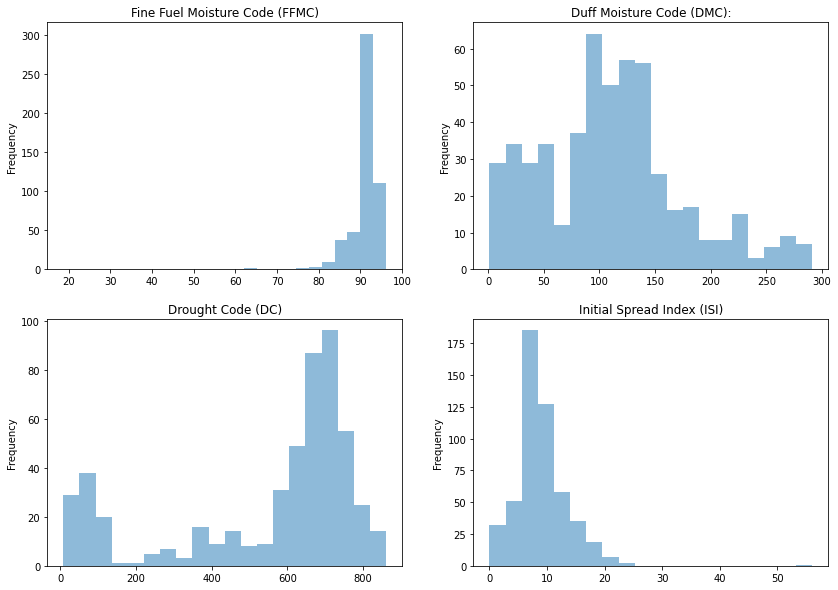

In [11]:
def plot_fwi_indicators(data):
    fig, axes = plt.subplots(2,2, figsize=(14,10))
    data['FFMC'].plot.hist(ax=axes[0,0], bins=25, alpha=0.5, title='Fine Fuel Moisture Code (FFMC)')
    data['DMC'].plot.hist(ax=axes[0,1], bins=20, alpha=0.5, title='Duff Moisture Code (DMC):')
    data['DC'].plot.hist(ax=axes[1,0], bins=20, alpha=0.5, title='Drought Code (DC)');
    data['ISI'].plot.hist(ax=axes[1,1], bins=20, alpha=0.5, title='Initial Spread Index (ISI)');
plot_fwi_indicators(df)

### Weather Indicators
- temp: Temperature (Celcius)
- RH: Relative humidity (%)
- wind (km/h)
- rain (mm/m2)

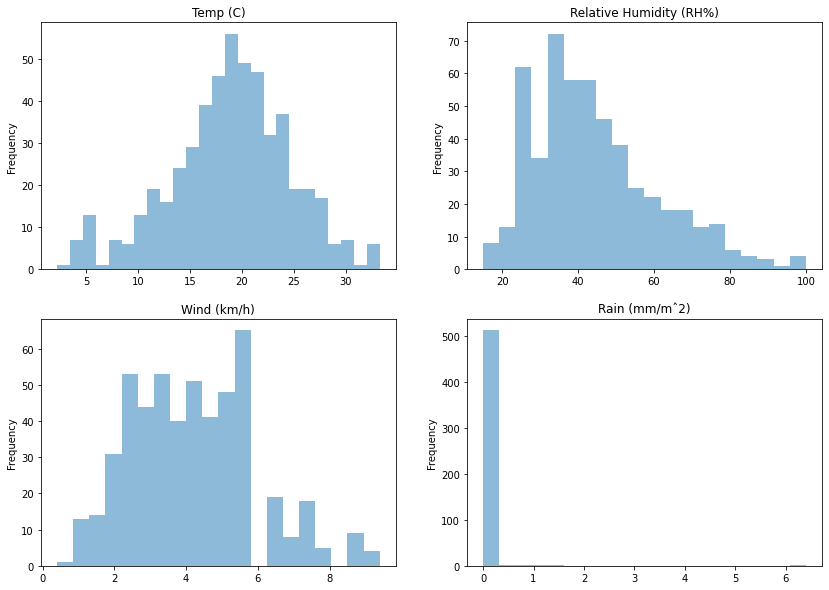

In [12]:
def plot_weather_indicators(data):
    fig, axes = plt.subplots(2,2, figsize=(14,10))
    data['temp'].plot.hist(ax=axes[0,0], bins=25, alpha=0.5, title='Temp (C)')
    data['RH'].plot.hist(ax=axes[0,1], bins=20, alpha=0.5, title='Relative Humidity (RH%)')
    data['wind'].plot.hist(ax=axes[1,0], bins=20, alpha=0.5, title='Wind (km/h)');
    data['rain'].plot.hist(ax=axes[1,1], bins=20, alpha=0.5, title='Rain (mm/mˆ2)');
plot_weather_indicators(df)

In [13]:
# Remove Rain Outliers
sorted_rain = df.rain.sort_values(ascending=False)
print(sorted_rain.head(10))
print(sorted_rain.tail(5))
df = df[df.rain < 6.0]

499    6.4
509    1.4
243    1.0
500    0.8
501    0.8
502    0.4
286    0.2
3      0.2
516    0.0
172    0.0
Name: rain, dtype: float64
346    0.0
347    0.0
348    0.0
349    0.0
0      0.0
Name: rain, dtype: float64


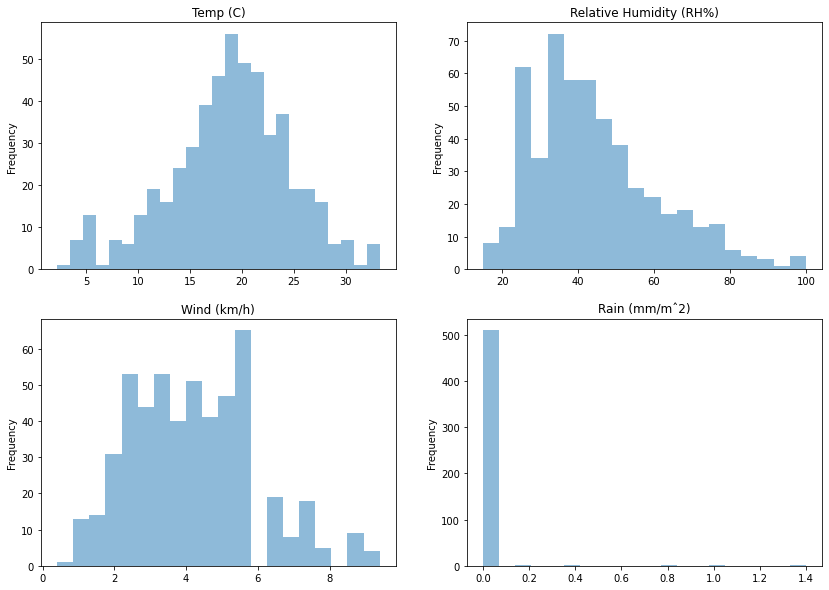

In [14]:
plot_weather_indicators(df)

### Target: Burnt Area

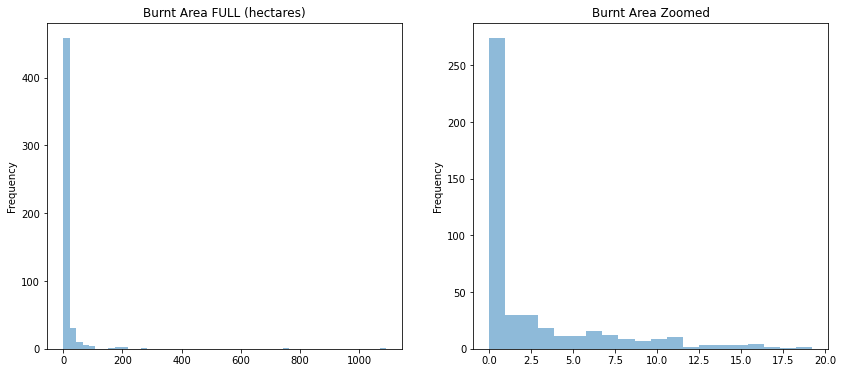

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
df.area.plot.hist(ax = ax1, bins=50, alpha=0.5, title="Burnt Area FULL (hectares)");
df[df.area < 20].area.plot.hist(ax = ax2, bins=20, alpha=0.5, title="Burnt Area Zoomed");

### Area Outliers

<AxesSubplot:>

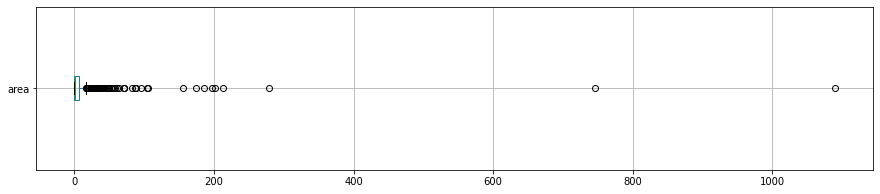

In [16]:
df.boxplot('area', vert=False, figsize=(15,3))

In [17]:
max_area = 70
df = df[df.area < max_area]

### Correlation Analysis

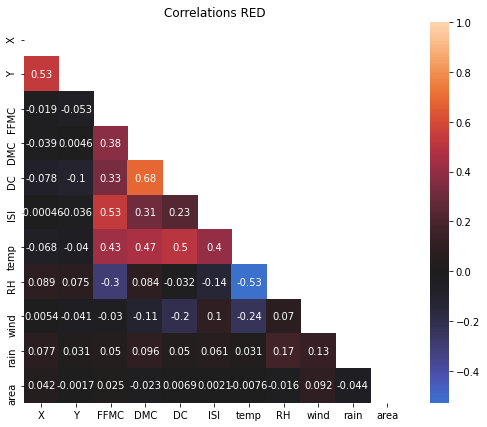

In [18]:
def plot_corr_mat(data, title):
    correlations = data.corr()
    mask = np.zeros_like(correlations)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(9, 7)); plt.title(title) 
    sns.heatmap(correlations, mask=mask, annot=True, square=True, center=0)
plot_corr_mat(df, "Correlations RED")

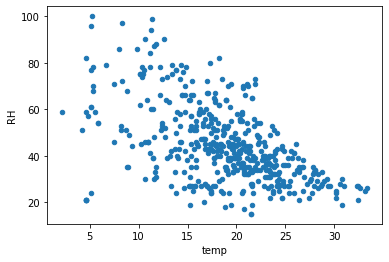

In [19]:
df.plot.scatter(x='temp', y='RH');

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:  75%|███████▌  | 21/28 [00:00<00:00, 22.86it/s, Get scatter matrix]            

### Modelling

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
pd.options.display.float_format = "{:,.2f}".format

In [22]:
features = ["X","Y","FFMC","DMC","DC","ISI","temp","RH","wind","rain"]
X = df[features]
y = df.area
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape, X_test.shape)
print(y_test.shape, y_test.shape)

(373, 10) (125, 10)
(125,) (125,)


In [23]:
# Polynomial transformations
from sklearn.preprocessing import PolynomialFeatures
X_train_polyer = PolynomialFeatures(degree=2)
X_test_polyer = PolynomialFeatures(degree=2)
X_train_poly = X_train_polyer.fit_transform(X_train)
X_test_poly = X_test_polyer.fit_transform(X_test)
print(X_train_polyer.get_feature_names(features))
X_train_poly.shape

['1', 'X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'X^2', 'X Y', 'X FFMC', 'X DMC', 'X DC', 'X ISI', 'X temp', 'X RH', 'X wind', 'X rain', 'Y^2', 'Y FFMC', 'Y DMC', 'Y DC', 'Y ISI', 'Y temp', 'Y RH', 'Y wind', 'Y rain', 'FFMC^2', 'FFMC DMC', 'FFMC DC', 'FFMC ISI', 'FFMC temp', 'FFMC RH', 'FFMC wind', 'FFMC rain', 'DMC^2', 'DMC DC', 'DMC ISI', 'DMC temp', 'DMC RH', 'DMC wind', 'DMC rain', 'DC^2', 'DC ISI', 'DC temp', 'DC RH', 'DC wind', 'DC rain', 'ISI^2', 'ISI temp', 'ISI RH', 'ISI wind', 'ISI rain', 'temp^2', 'temp RH', 'temp wind', 'temp rain', 'RH^2', 'RH wind', 'RH rain', 'wind^2', 'wind rain', 'rain^2']


(373, 66)

In [24]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
print(model.coef_)
y_pred[:10]

[ 3.45818080e+09 -3.64818292e+01  4.05300194e+01  2.34848695e+01
 -8.82982487e-01 -7.40555233e-03 -2.67918034e+01  4.29684212e+00
  3.71903993e+00  1.04814972e+01 -8.14979163e-04  6.97797232e-02
 -3.92840997e-01  5.28945394e-01  1.85565747e-03 -1.85608367e-03
 -1.23535123e-01 -3.29298903e-01 -6.84885121e-02  3.22770010e-01
 -3.30579011e-02  3.09783511e-01 -5.57861245e-01  3.24572904e-03
  9.19018141e-03 -3.48233380e-03  1.77458979e-01  6.51716911e-02
 -6.93750245e-01  3.45405101e-02 -1.33427052e-01  1.05040100e-02
 -8.28684570e-04  2.73413438e-01 -1.74239111e-02 -4.06854689e-02
 -8.50007427e-02 -1.20451909e-02  1.68462160e-04 -2.99789205e-04
 -5.69998105e-03  4.10349963e-03  9.32403614e-04 -6.99004385e-03
 -2.18939441e-01  8.74227508e-05 -1.73796969e-03  1.65358993e-04
  4.29426868e-05  1.58892095e-03  7.16630208e-02 -4.20943401e-02
  5.93410631e-02  6.59479103e-02  1.90083136e-01 -1.56745041e-01
 -3.55489639e-02 -2.42226589e-02 -6.86156982e-02 -4.20193401e-02
 -1.01086629e-03 -3.66484

array([-0.27084017,  7.7736516 , 17.08631277,  5.24893475, 11.08683729,
       -2.23742199,  4.19925404, -2.74382782,  6.90766859,  9.29160309])

In [25]:
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

,Actuals,Predictions
425,0.00,-0.27
391,30.18,7.77
38,0.00,17.09
264,6.54,5.25
244,2.87,11.09
...,...,...
403,0.00,6.92
290,0.00,2.02
475,3.19,14.16
289,0.00,1.90


(MAE) Mean absolute error: 9.52
(MSE) Mean squared error: 863.92
(R2) Coefficient of determination: -17.66


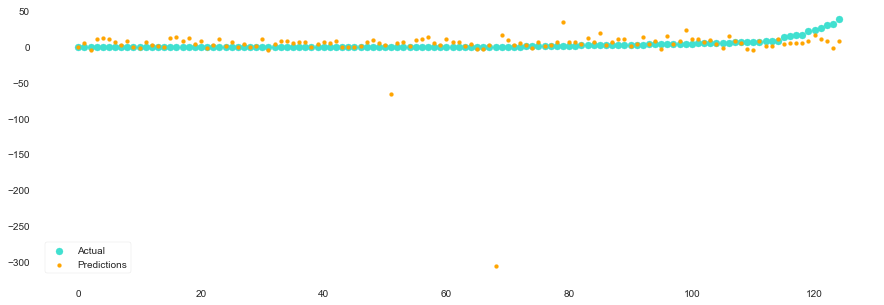

In [26]:
def evaluate(y_test, y_pred):
    print('(MAE) Mean absolute error: %.2f' % mean_absolute_error(y_test, y_pred))
    print('(MSE) Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('(R2) Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    
    a = np.concatenate((y_test.values.reshape(-1,1), y_pred.reshape(-1,1)), axis=1)
    a = a[a[:,0].argsort()]

    fig, ax = plt.subplots(figsize=(15,5))
    x_ticks = range(y_test.shape[0])
    ax.scatter(x_ticks, a[:,0], label='Actual', c='turquoise')
    ax.scatter(x_ticks, a[:,1], label='Predictions', s=15, c='orange');
    ax.legend()
evaluate(y_test, y_pred)

Training Data
(MAE) Mean absolute error: 7.40
(MSE) Mean squared error: 124.00
(R2) Coefficient of determination: 0.08


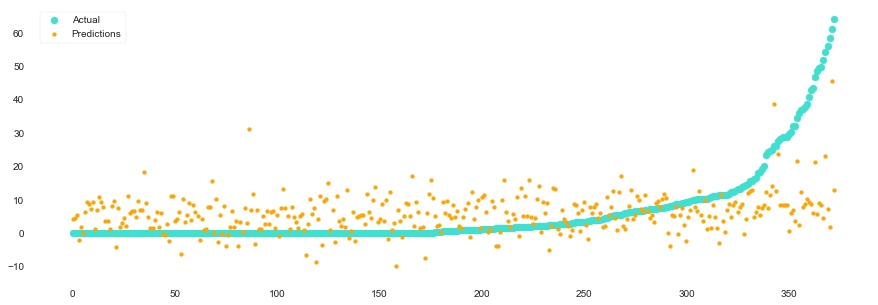

In [27]:
# Evaluata Train Data
print("Training Data")
evaluate(y_train, model.predict(X_train_poly))

### SVR

In [28]:
from sklearn.preprocessing import StandardScaler
xscaler = StandardScaler(); x_test_scaler = StandardScaler()
yscaler = StandardScaler(); y_test_scaler = StandardScaler()
X_train_sc = xscaler.fit_transform(X_train)
y_train_sc = yscaler.fit_transform(y_train.values.reshape(-1,1))
X_test_sc = x_test_scaler.fit_transform(X_test)
y_test_sc = y_test_scaler.fit_transform(y_test.values.reshape(-1,1))

In [29]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_sc, y_train_sc.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
y_preds_sc = svr.predict(X_test_sc)
y_preds = y_test_scaler.inverse_transform(y_preds_sc)
y_preds[:10]

array([ 1.08840825,  1.99801178,  1.02624859,  0.50202368,  1.59295669,
        1.65927249,  0.4763625 ,  2.32040265,  0.2693244 , -0.31531159])

(MAE) Mean absolute error: 3.37
(MSE) Mean squared error: 49.44
(R2) Coefficient of determination: -0.07


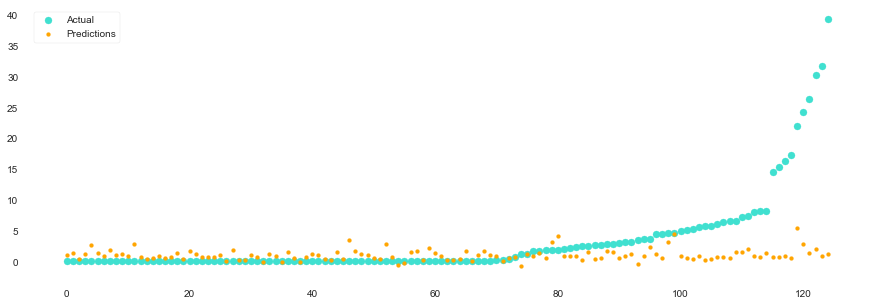

In [31]:
evaluate(y_test, y_preds)

Training Data
(MAE) Mean absolute error: 5.26
(MSE) Mean squared error: 134.25
(R2) Coefficient of determination: -0.00


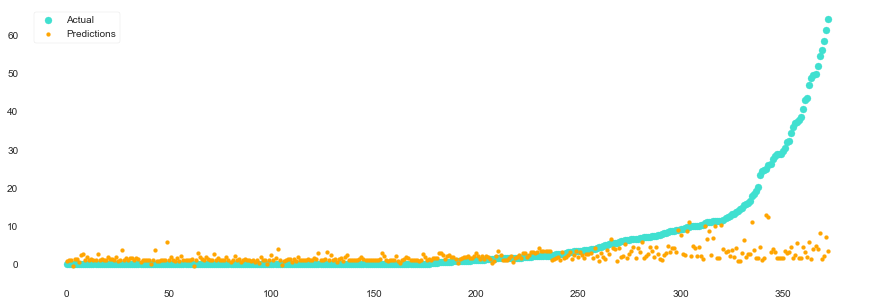

In [32]:
# Evaluata Train Data
print("Training Data")
evaluate(y_train, yscaler.inverse_transform(svr.predict(X_train_sc)))